In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pygrts

import df_utils

In [3]:
# !pip install contextily

In [4]:
import contextily as cx

## Create fake sample points

In [5]:
rng = np.random.default_rng(100)

In [6]:
num_samples = 1_000
sparse = np.c_[
    rng.uniform(low=-90, high=-88, size=num_samples),
    rng.uniform(low=44, high=46, size=num_samples),
]
dense = np.c_[
    rng.uniform(low=-88.7, high=-88.5, size=int(num_samples * 0.25)),
    rng.uniform(low=44.5, high=45, size=int(num_samples * 0.25)),
]
data = np.vstack((sparse, dense))

In [7]:
df = df_utils.frame_from_coords(data)

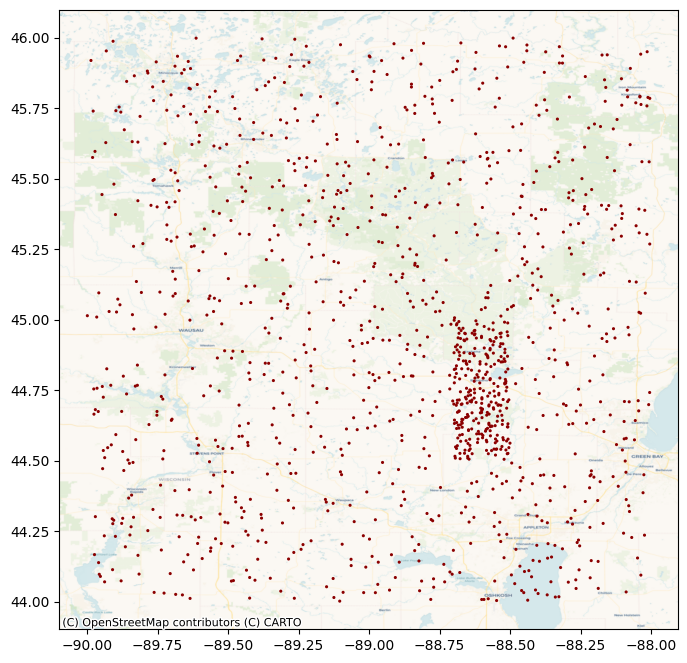

In [8]:
ax = df.plot(color="darkred", ec="none", markersize=5, figsize=(7, 10))
cx.add_basemap(
    ax,
    crs=df.crs,
    source=cx.providers.CartoDB.Voyager,
    zoom=10,
)
plt.tight_layout()

# Spatially-balanced sampling

### Re-project the data so we can work in meters

In [9]:
df = df.to_crs("epsg:8858")

### Setup the GRTS grids

In [10]:
qt = pygrts.QuadTree(df, force_square=True)

### Split the area into grids with lengths no greater than 10 km

In [11]:
qt.split_recursive(max_length=10_000)

/var/folders/9h/nb9mkr_j1gq1kmpq663b4myw0000gp/T/ipykernel_61722/2696163038.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


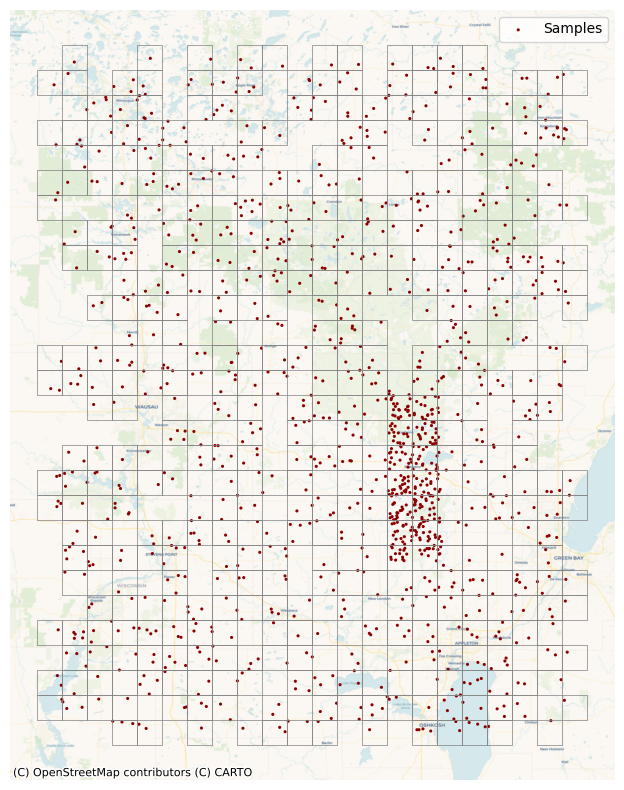

In [12]:
fig, ax = plt.subplots(figsize=(7, 8), dpi=100)

df.plot(color="darkred", ec="none", markersize=5, label="Samples", legend=True, ax=ax)
qt.to_frame().plot(color="none", ec="grey", lw=0.5, label="GRTS grid", ax=ax)
cx.add_basemap(
    ax,
    crs=df.crs,
    source=cx.providers.CartoDB.Voyager,
    zoom=10,
)
ax.legend()
ax.axis("off")
plt.tight_layout()

### Take a random sample using GRTS indexing

#### Randomly select 50 grids

In [17]:
n = 50

#### Randomly select 1 sample within each grid

In [18]:
samples_per_grid = 1

In [19]:
samp_df = qt.sample(n=n, samples_per_grid=samples_per_grid, random_state=100)

/var/folders/9h/nb9mkr_j1gq1kmpq663b4myw0000gp/T/ipykernel_61722/3568741227.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


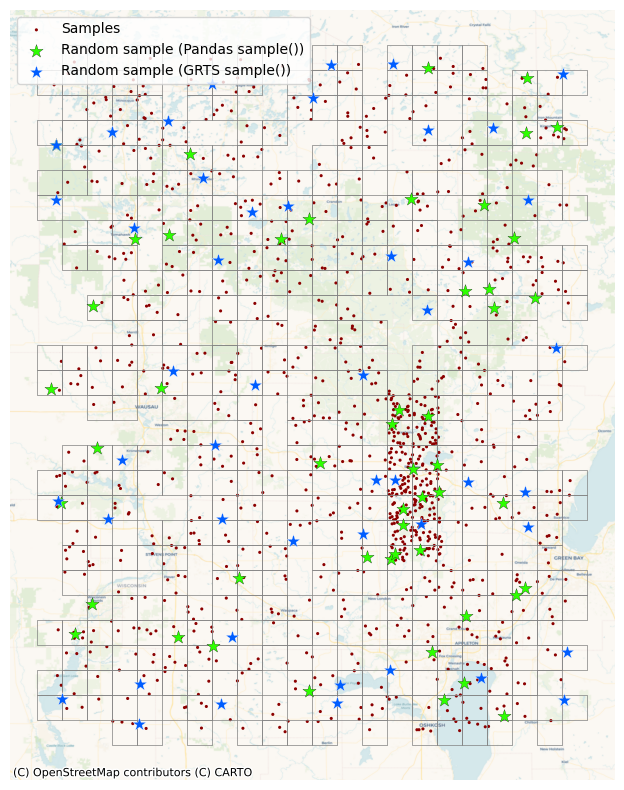

In [21]:
fig, ax = plt.subplots(figsize=(7, 8), dpi=100)

df.plot(
    color="darkred",
    ec="none",
    markersize=5,
    categorical=True,
    label="Samples",
    legend=True,
    ax=ax,
)
qt.to_frame().plot(color="none", ec="grey", lw=0.5, label="GRTS grid", ax=ax)
df.sample(n=n, replace=False, random_state=100).plot(
    color="#2eff00",
    ec="k",
    lw=0.2,
    markersize=100,
    marker="*",
    label="Random sample (Pandas sample())",
    categorical=True,
    legend=True,
    ax=ax,
)
samp_df.plot(
    color="#005dff",
    ec="white",
    lw=0.2,
    markersize=100,
    marker="*",
    label="Random sample (GRTS sample())",
    categorical=True,
    legend=True,
    ax=ax,
)
cx.add_basemap(
    ax,
    crs=df.crs,
    source=cx.providers.CartoDB.Voyager,
    zoom=10,
)
ax.axis("off")
ax.legend()
plt.tight_layout()

#### Increase the sample count per grid

In [22]:
samples_per_grid = 5

In [23]:
samp_df = qt.sample(n=n, samples_per_grid=samples_per_grid, random_state=100)

/var/folders/9h/nb9mkr_j1gq1kmpq663b4myw0000gp/T/ipykernel_61722/3568741227.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


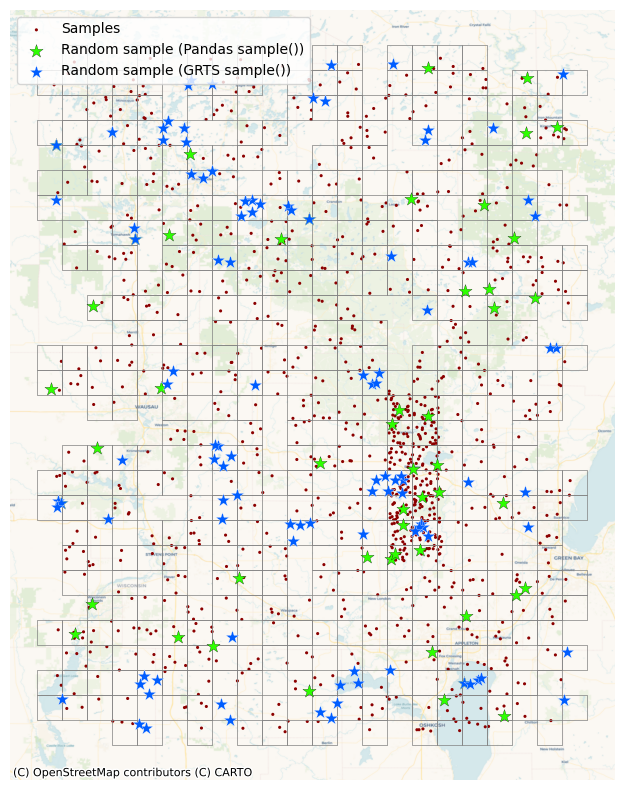

In [25]:
fig, ax = plt.subplots(figsize=(7, 8), dpi=100)

df.plot(
    color="darkred",
    ec="none",
    markersize=5,
    categorical=True,
    label="Samples",
    legend=True,
    ax=ax,
)
qt.to_frame().plot(color="none", ec="grey", lw=0.5, label="GRTS grid", ax=ax)
df.sample(n=n, replace=False, random_state=100).plot(
    color="#2eff00",
    ec="k",
    lw=0.2,
    markersize=100,
    marker="*",
    label="Random sample (Pandas sample())",
    categorical=True,
    legend=True,
    ax=ax,
)
samp_df.plot(
    color="#005dff",
    ec="white",
    lw=0.2,
    markersize=100,
    marker="*",
    label="Random sample (GRTS sample())",
    categorical=True,
    legend=True,
    ax=ax,
)
cx.add_basemap(
    ax,
    crs=df.crs,
    source=cx.providers.CartoDB.Voyager,
    zoom=10,
)
ax.axis("off")
ax.legend()
plt.tight_layout()

### Add random strata

In [26]:
df["strata"] = rng.integers(low=0, high=2, size=len(df.index))

In [27]:
qt = pygrts.QuadTree(df, force_square=True)
qt.split_recursive(max_length=25_000)

#### Randomly sample, stratified by class value

In [28]:
n = 10

In [29]:
samp_df = qt.sample(
    n=n,
    strata_column="strata",
    random_state=100,
)

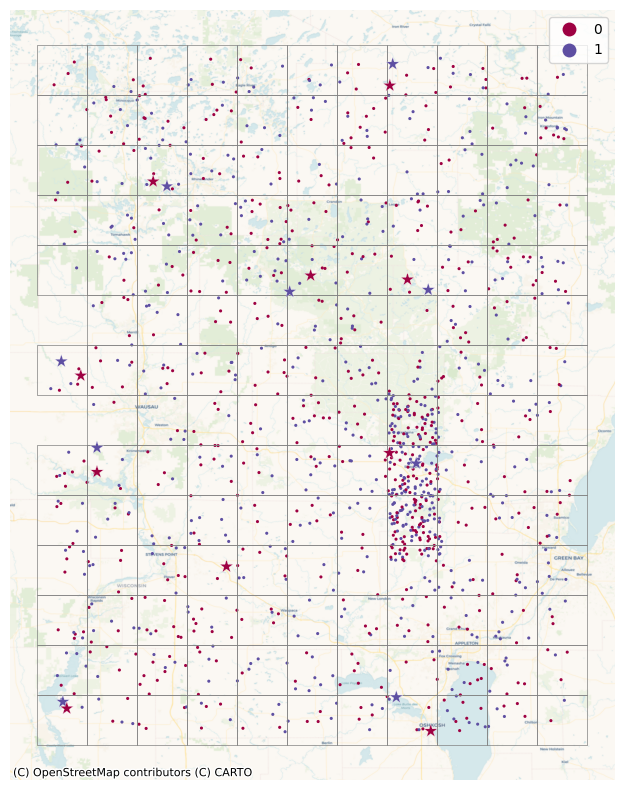

In [30]:
fig, ax = plt.subplots(figsize=(7, 8), dpi=100)

df.plot(
    column="strata",
    ec="none",
    markersize=5,
    categorical=True,
    cmap="Spectral",
    legend=True,
    ax=ax,
)
qt.to_frame().plot(color="none", ec="grey", lw=0.5, label="GRTS grid", ax=ax)
samp_df.plot(
    column="strata",
    ec="white",
    lw=0.2,
    markersize=100,
    categorical=True,
    cmap="Spectral",
    marker="*",
    legend=True,
    ax=ax,
)
cx.add_basemap(
    ax,
    crs=df.crs,
    source=cx.providers.CartoDB.Voyager,
    zoom=10,
)
ax.axis("off")
plt.tight_layout()